# Lab2. Latent Consistency Model using Optimum-Intel OpenVINO

### Select inference device for text-to-image generation

In [1]:
from utils.notebook_utils import device_widget

device = device_widget()

device

Dropdown(description='Device:', index=3, options=('CPU', 'GPU', 'NPU', 'AUTO'), value='AUTO')

### Running inference using Optimum Intel `OVLatentConsistencyModelPipeline`

In [2]:
from optimum.intel import OVLatentConsistencyModelPipeline
from pathlib import Path

if not Path("./model/lcm").exists():
    ov_pipeline = OVLatentConsistencyModelPipeline.from_pretrained("OpenVINO/LCM_Dreamshaper_v7-int8-ov", height=512, width=512, compile=False)
    ov_pipeline.save_pretrained("./model/lcm")
else:
    ov_pipeline = OVLatentConsistencyModelPipeline.from_pretrained("./model/lcm", export=False, compile=False)

ov_pipeline.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)

You have disabled the safety checker for <class 'optimum.intel.openvino.modeling_diffusion.OVLatentConsistencyModelPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


OVLatentConsistencyModelPipeline {
  "_class_name": "OVLatentConsistencyModelPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "OpenVINO/LCM_dreamshaper_v7-int8-ov",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "LCMScheduler"
  ],
  "text_encoder": [
    "optimum.intel.openvino.modeling_diffusion",
    "OVModelTextEncoder"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "optimum.intel.openvino.modeling_diffusion",
    "OVModelUnet"
  ],
  "vae": [
    "optimum.intel.openvino.modeling_diffusion",
    "OVModelVae"
  ]
}

In [3]:
ov_pipeline.to(device.value)
ov_pipeline.compile()

  0%|          | 0/4 [00:00<?, ?it/s]

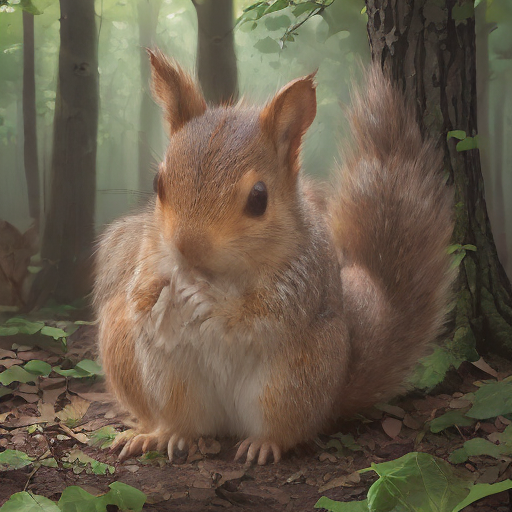

In [4]:
prompt = "A cute squirrel in the forest, portrait, 8k"

image_ov = ov_pipeline(prompt=prompt, num_inference_steps=4, guidance_scale=8.0, height=512, width=512).images[0]
image_ov.save("image_opt.png")
image_ov